---

# Advanced `pandas`

<h1 style="color: #fcd805">Exercise: Advanced pandas</h1>

Load in the Kickstarter data again.

For these questions, see if you can use the method chaining style of coding to solve the problems.

1. Convert the `state` column to be categorical. Choose a specific ordering for the states.

In [1]:
import pandas as pd

kickstarter = pd.read_csv("./data/kickstarter.csv.gz")

kickstarter.head()

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,1000.0,2015-08-11 12:12:28,0.0,failed,0,GB,0.0
1,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,30000.0,2017-09-02 04:43:57,2421.0,failed,15,US,100.0
2,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,45000.0,2013-01-12 00:20:50,220.0,failed,3,US,220.0
3,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16,5000.0,2012-03-17 03:24:11,1.0,failed,1,US,1.0
4,1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29,19500.0,2015-07-04 08:35:03,1283.0,canceled,14,US,1283.0


In [2]:
state_type = pd.CategoricalDtype(['successful', 'failed', 'canceled', 'live', 'undefined', 'suspended'])

kickstarter["state"] = kickstarter["state"].astype(state_type)

2. Calculate the average goal amount per state and display the results as a bar chart. Verify that the ordering you specified in your previous step has been taken into account.

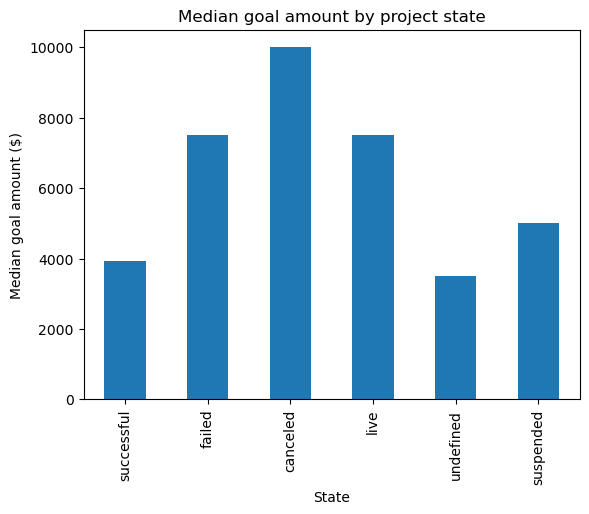

In [3]:
_ = (
    kickstarter
    .groupby("state")
    ["goal"]
    .median()
    .plot(kind="bar",
          title="Median goal amount by project state",
          xlabel="State",
          ylabel="Median goal amount ($)"
         )
)

3. What is the distribution of the `state` variable across different categories?

You should create a table with one row per category and one column per state. The cell values should be the number of projects for each category-state pair, e.g.

| |Failed|Succeed|
|---|---|---|
|**Art**|100|60|
|**Food**|72|103|
|**Music**|1412|835|

(Note, this isn't real data, just an illustration of the structure you're aiming for!)

In [4]:
state_category_table = kickstarter.pivot_table(
    index="main_category",
    columns="state",
    values="ID",
    aggfunc="count"
)

state_category_table

state,successful,failed,canceled,live,undefined,suspended
main_category,,,,,,
Art,11510,14131,2222,194,0,96
Comics,5842,4036,842,76,0,23
Crafts,2115,5703,843,76,0,72
Dance,2338,1235,163,18,1,13
Design,10550,14814,4152,305,2,247
Fashion,5593,14182,2650,250,3,138
Film & Video,23623,32904,5755,332,854,117
Food,6085,15969,2211,184,0,153
Games,12518,16003,6202,287,1,220


4. Create a heatmap to visualise the table you created in step 3.

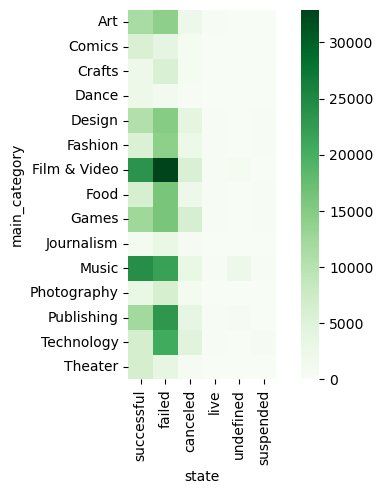

In [5]:
import seaborn as sns

_ = sns.heatmap(
    data=state_category_table,
    vmin=0,
    cmap="Greens",
    square=True
)

5. We're going to find the projects that *nearly* made it.

5.a. First, create a column to calculate the pledged amount as a percentage of the project goal

In [6]:
kickstarter["pledged_pct"] = kickstarter["pledged"] / kickstarter["goal"]

5.b. Now, write a Python function that determines is a project nearly made it.

The function should return True *only* if the following conditions are met for a single row:

- the goal was less than $100,000
- the state was `"failed"`
- the pledge as a percentage of the goal was over 90%

In [7]:
def nearly_made_it(row):
    return row["goal"] < 100_000 and row["state"] == "failed" and row["pledged_pct"] > 0.9

5.c. Use `.apply` on your `DataFrame` to call your function on all rows. Save the result in a column which indicates whether a project nearly made it.

In [8]:
kickstarter["nearly_made_it"] = kickstarter.apply(nearly_made_it, axis=1)

5.d. Using your new column, how many projects nearly made it?

In [9]:
kickstarter["nearly_made_it"].value_counts()

nearly_made_it
False    378474
True        187
Name: count, dtype: int64

In [10]:
# randomly sample a few that nearly made it
kickstarter[kickstarter["nearly_made_it"]].sample(10, random_state=42)

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,pledged_pct,nearly_made_it
377322,993338131,Pyrex & Shookz - The Resume,Hip-Hop,Music,AUD,2016-01-07,1000.0,2015-11-18 02:42:50,999.00,failed,1,AU,710.90,0.999000,True
164572,1837541169,KB Mount - Smartphone Mount for DSLR Cameras,Hardware,Technology,USD,2014-01-20,3000.0,2013-12-18 21:30:05,2954.00,failed,54,US,2954.00,0.984667,True
105831,1537990172,NASA SEALS,Science Fiction,Film & Video,USD,2014-10-25,55000.0,2014-09-12 22:16:06,51351.00,failed,222,US,51351.00,0.933655,True
267268,429756829,Agate Coasters by Kaia (Relaunched),Product Design,Design,GBP,2017-11-05,350.0,2017-10-06 10:39:36,332.00,failed,12,GB,0.00,0.948571,True
312747,663093557,Urbanshell Bag Cover,Product Design,Design,GBP,2014-12-16,6000.0,2014-11-16 02:30:10,5477.00,failed,93,GB,8586.31,0.912833,True
25483,1129471005,LOJO! LoLoL Jar Opener,Product Design,Design,USD,2016-07-18,1500.0,2016-06-11 20:12:28,1360.00,failed,61,US,1019.00,0.906667,True
161298,1820430038,Workshop production of MARVIN'S TRIAL in Balti...,Theater,Theater,USD,2012-12-01,2900.0,2012-11-01 23:48:17,2765.00,failed,23,US,2765.00,0.953448,True
296202,577868971,Shadowfist: A Better Tomorrow,Tabletop Games,Games,USD,2017-11-13,30000.0,2017-10-12 15:05:48,27268.00,failed,177,US,4201.00,0.908933,True
246188,322014991,iLanyard: Keeping earbuds under control,Product Design,Design,USD,2014-04-30,8000.0,2014-04-10 13:57:59,7661.00,failed,194,US,7661.00,0.957625,True
343192,818363688,The 5th Annual 90 Square Arts Festival,Festivals,Theater,USD,2016-01-06,12000.0,2015-11-17 07:11:53,11999.69,failed,77,US,11999.69,0.999974,True


<h1 style="color: #fcd805">Exercise: Changing names</h1>

We're going to investigate how the popularity of names has changed over time.

What names are popular changes over time. To illustrate this, several articles pointed out that in 2013 only 28 babies were named Gary in the UK, whereas it was once a much more popular choice.

Let's see how the popularity of names has changed in recent years.

Our data comes from the Office of National Statistics: [baby names](https://www.ons.gov.uk/peoplepopulationandcommunity/birthsdeathsandmarriages/livebirths/datasets/babynamesenglandandwalesbabynamesstatisticsboys).

## Part 1 - reading and cleaning the data

There are 3 Excel files for 2019, 2020, and 2021.

1. Start by opening the 2019 file in Excel. Find where the raw count data is located for England and Wales (we want a list of boys names and their counts in a single, long table).

Now, use the `read_excel` method in `pandas` to read the data into a `pandas` DataFrame.

_Note: You will need to investigate and change some of the options!_

In [11]:
names_2019 = pd.read_excel("./data/2019boysnames.xlsx",
                           sheet_name="Table 6",
                           skiprows=5)
names_2019

,Rank,Name,Count3,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7
0,1,OLIVER,4932.0,NaN,NaN,NaN,NaN,NaN
1,2,GEORGE,4575.0,NaN,NaN,NaN,NaN,NaN
2,3,NOAH,4265.0,NaN,NaN,NaN,NaN,NaN
3,4,ARTHUR,4211.0,NaN,NaN,NaN,NaN,NaN
4,5,HARRY,3823.0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
6092,1 These rankings have been produced using the ...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6093,2 Births where the name was not stated have be...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6094,3 Names with a count of 2 or less have been re...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6095,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


2. Drop any columns you don't need (`pandas` might have read in some empty data!)

In [12]:
names_2019.columns

Index(['Rank', 'Name', 'Count3', 'Unnamed: 3', 'Unnamed: 4', 'Unnamed: 5',
       'Unnamed: 6', 'Unnamed: 7'],
      dtype='object')

In [13]:
names_2019 = (
    names_2019
    .drop(columns=['Unnamed: 3', 'Unnamed: 4',
                   'Unnamed: 5', 'Unnamed: 6',
                   'Unnamed: 7'])
)

names_2019

,Rank,Name,Count3
0,1,OLIVER,4932.0
1,2,GEORGE,4575.0
2,3,NOAH,4265.0
3,4,ARTHUR,4211.0
4,5,HARRY,3823.0
...,...,...,...
6092,1 These rankings have been produced using the ...,NaN,NaN
6093,2 Births where the name was not stated have be...,NaN,NaN
6094,3 Names with a count of 2 or less have been re...,NaN,NaN
6095,NaN,NaN,NaN


3. Use the `rename` function to rename any columns that need better names.

In [14]:
names_2019 = names_2019.rename(columns={"Count3": "Count"})

4. Drop any rows you don't need. How can you identify rows that aren't actually part of your data?

In [15]:
names_2019 = names_2019.dropna(subset=["Name"])
names_2019

,Rank,Name,Count
0,1,OLIVER,4932.0
1,2,GEORGE,4575.0
2,3,NOAH,4265.0
3,4,ARTHUR,4211.0
4,5,HARRY,3823.0
...,...,...,...
6086,4702,ZORAN,3.0
6087,4702,ZSOMBOR,3.0
6088,4702,ZUBEYR,3.0
6089,4702,ZUHAYR,3.0


5. Check the data types and convert any columns that need it.

In [16]:
names_2019.dtypes

Rank      object
Name      object
Count    float64
dtype: object

In [17]:
names_2019["Rank"] = names_2019["Rank"].astype(int)

6. Add a column to this DataFrame called `Year` which has the value 2019 for all rows.

In [18]:
names_2019["Year"] = 2019
names_2019

,Rank,Name,Count,Year
0,1,OLIVER,4932.0,2019
1,2,GEORGE,4575.0,2019
2,3,NOAH,4265.0,2019
3,4,ARTHUR,4211.0,2019
4,5,HARRY,3823.0,2019
...,...,...,...,...
6086,4702,ZORAN,3.0,2019
6087,4702,ZSOMBOR,3.0,2019
6088,4702,ZUBEYR,3.0,2019
6089,4702,ZUHAYR,3.0,2019


7. Repeat the process for the 2020 and 2021 files.

You should end up with 3 DataFrames, one for each year.

Things to ensure:

- add the `Year` column with the correct year to each `DataFrame`
- column names and data types should be identical in all `DataFrames`

_Note: don't just run the same code with a different filename! Open each file and check that the data is stored in the same way, and amend your code if it isn't._

In [19]:
# 2020 file looks like it has the same table
# on the sheet called Table 6
names_2020 = pd.read_excel("./data/2020boysnames.xlsx",
                           sheet_name="Table 6",
                           skiprows=5)

names_2020 = (
    names_2020
    .drop(columns=['Unnamed: 3', 'Unnamed: 4',
                   'Unnamed: 5', 'Unnamed: 6',
                   'Unnamed: 7'])
    # optional, but renaming makes sense 
    .rename(columns={"Count3": "Count"})
    .dropna(subset=["Name"])
    .assign(
        Rank=lambda df_: df_["Rank"].astype(int),
        Year=2020
    )
)

names_2020

,Rank,Name,Count,Year
0,1,OLIVER,4225.0,2020
1,2,GEORGE,4100.0,2020
2,3,ARTHUR,4052.0,2020
3,4,NOAH,4042.0,2020
4,5,MUHAMMAD,3710.0,2020
...,...,...,...,...
5973,4608,ZEYAAN,3.0,2020
5974,4608,ZICO,3.0,2020
5975,4608,ZIEMOWIT,3.0,2020
5976,4608,ZSOMBOR,3.0,2020


In [20]:
# 2021 file is a bit different!
# the relevant sheet is just called 6 for starters
# and the data is shifted down a row
names_2021 = pd.read_excel("./data/2021boysnamesupdated1.xlsx",
                           sheet_name="6",
                           skiprows=6)

names_2021

,Rank,Name,Count
0,1,Noah,4525
1,2,Oliver,4167
2,3,George,4141
3,4,Arthur,3766
4,5,Muhammad,3722
...,...,...,...
6197,4789,Zlatan,3
6198,4789,Zsombor,3
6199,4789,Zuhaan,3
6200,4789,Zuko,3


_There's no strange text at the bottom, so nothing to clear up there, plus the column names are nice and clean_

In [21]:
names_2021.dtypes

Rank      int64
Name     object
Count     int64
dtype: object

In [22]:
names_2021["Year"] = 2021

8. Use `pd.concat` to combine the 3 datasets into 1.

Call your combined DataFrame `names`.

In [23]:
names = pd.concat([names_2019, names_2020, names_2021],
                  axis=0,
                  ignore_index=True)
names

,Rank,Name,Count,Year
0,1,OLIVER,4932.0,2019
1,2,GEORGE,4575.0,2019
2,3,NOAH,4265.0,2019
3,4,ARTHUR,4211.0,2019
4,5,HARRY,3823.0,2019
...,...,...,...,...
18266,4789,Zlatan,3.0,2021
18267,4789,Zsombor,3.0,2021
18268,4789,Zuhaan,3.0,2021
18269,4789,Zuko,3.0,2021


9. Convert the name column to uppercase to ensure all names are uppercase

In [24]:
names["Name"] = names["Name"].str.upper()

10. Drop any missing values.

In [25]:
names.isnull().sum()

Rank     0
Name     2
Count    0
Year     0
dtype: int64

In [26]:
names = names.dropna(subset=["Name"])

11. Use your `names` `DataFrame` to see how many Garys were born in each year from 2019 to 2021.

In [27]:
names[names["Name"] == "GARY"]

,Rank,Name,Count,Year
1273,1253,GARY,20.0,2019
8217,2076,GARY,10.0,2020
13411,1329,GARY,19.0,2021


## Part 2 - analysis

Now that we have our raw data, let's investigate it.

1. How many names are there in each year?

In [28]:
names.groupby("Year")["Name"].count()

Year
2019    6090
2020    5977
2021    6202
Name: Name, dtype: int64

2. Which name had the most occurrences in a given year across the entire data? That is, what is the highest number of occurrences of a name in the dataset?

In [29]:
names["Count"].max()

4932.0

In [30]:
names.sort_values("Count", ascending=False).head(1)

,Rank,Name,Count,Year
0,1,OLIVER,4932.0,2019


3. What is the most common first *letter* for boys' names?

In [31]:
(
    names
    # with this method chaining approach we don't even need to permanently create a new column
    .assign(first_letter=lambda df_: df_["Name"].str[0])
    ["first_letter"]
    .value_counts()
    .head()
)

first_letter
A    2515
M    1386
R    1330
K    1256
S    1179
Name: count, dtype: int64

4. What are the 5 most common names overall? Save these names into a separate variable (e.g. a list or a `Series`).

In [32]:
top5 = (
    names
    # add up the count column across all years
    .groupby("Name")
    ["Count"]
    .sum()
    
    # sort in descending order
    .sort_values(ascending=False)
    
    # to select the top 5
    .head()
    
    .index
    # if we explicitly want a Python list
    .tolist()
)

top5

['OLIVER', 'NOAH', 'GEORGE', 'ARTHUR', 'MUHAMMAD']

5. Now filter the `names` `DataFrame` so that only the top 5 names are kept (one row per name per year, so 15 rows in total)

In [33]:
top5_df = names[names["Name"].isin(top5)]
print(top5_df.shape)
top5_df

(15, 4)


,Rank,Name,Count,Year
0,1,OLIVER,4932.0,2019
1,2,GEORGE,4575.0,2019
2,3,NOAH,4265.0,2019
3,4,ARTHUR,4211.0,2019
6,7,MUHAMMAD,3604.0,2019
6091,1,OLIVER,4225.0,2020
6092,2,GEORGE,4100.0,2020
6093,3,ARTHUR,4052.0,2020
6094,4,NOAH,4042.0,2020
6095,5,MUHAMMAD,3710.0,2020


6. We are going to reshape this `DataFrame` to plot the frequency of each of the 5 names over time.

To do this, our data needs to be **one column per line** on our line plot.

In this case, that means:

- one column per name
- one row per year
- values in the cells are the count of a particular name in a particular year

Something like this (with dummy data):

| |John|Joseph|David|
|---|---|---|---|
|**2019**|100|60|44|
|**2020**|72|103|230|
|**2021**|142|435|374|

Reshape the `DataFrame` to achieve this format.

In [34]:
names_over_time = top5_df.pivot_table(index="Year", columns="Name", values="Count", aggfunc="sum")
names_over_time

Name,ARTHUR,GEORGE,MUHAMMAD,NOAH,OLIVER
Year,,,,,
2019,4211.0,4575.0,3604.0,4265.0,4932.0
2020,4052.0,4100.0,3710.0,4042.0,4225.0
2021,3766.0,4141.0,3722.0,4525.0,4167.0


7. Call the `.plot` function on this data. You should see years on the x-axis, count on the y-axis and one line per name.

Use your knowledge of `matplotlib` to clean up the visualisation and make it more presentation-ready, such as:

- adding a title and axis labels
- changing the "tick labels" (the values along the axis)

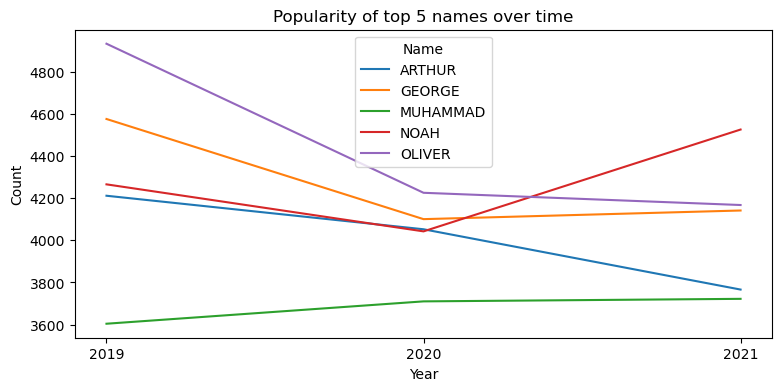

In [35]:
import matplotlib.pyplot as plt

fig, axis = plt.subplots(figsize=(9, 4))

names_over_time.plot(ax=axis)

axis.set(
    title="Popularity of top 5 names over time",
    xlabel="Year",
    ylabel="Count"
)

# ticks should only be years, not partial years like 2021.25
axis.set_xticks(sorted(names_over_time.index.unique()))

plt.show()

8. Now create a similar table, this time to track each name's rank over time.

The table should have:

- one row per name
- one column per year
- the values should be the **rank** of a name in a particular year (NaNs may be present for names that didn't appear in all years)

Something like this:

| |2019|2020|2021|
|---|---|---|---|
|**Robert**|407|392|232|
|**Stephen**|101|75|44|
|**Graham**|502|507|509|

In [36]:
rank_over_time = names.pivot_table(index="Name",
                                   columns="Year",
                                   values="Rank",
                                   aggfunc="sum" # there's only one value per cell so the aggregation doesn't matter
                                  )
rank_over_time

Year,2019,2020,2021
Name,,,
A,2104.0,3848.0,3451.0
A-JAY,NaN,2960.0,3451.0
AABAN,3937.0,3848.0,3990.0
AABID,3937.0,4608.0,NaN
AADAM,327.0,456.0,457.0
...,...,...,...
ZYAN,1869.0,2404.0,1329.0
ZYEON,NaN,4608.0,NaN
ZYGIMANTAS,4702.0,NaN,NaN


9. Create a column in this table called `diff` which is the difference of a name's rank between 2021 and 2019.

In [37]:
rank_over_time["diff"] = rank_over_time[2021] - rank_over_time[2019]
rank_over_time

Year,2019,2020,2021,diff
Name,,,,
A,2104.0,3848.0,3451.0,1347.0
A-JAY,NaN,2960.0,3451.0,NaN
AABAN,3937.0,3848.0,3990.0,53.0
AABID,3937.0,4608.0,NaN,NaN
AADAM,327.0,456.0,457.0,130.0
...,...,...,...,...
ZYAN,1869.0,2404.0,1329.0,-540.0
ZYEON,NaN,4608.0,NaN,NaN
ZYGIMANTAS,4702.0,NaN,NaN,NaN


10. Which names have moved up the most in the rankings and which ones have fallen the most?

_Note: remember, in rankings, the lower the better!_

In [38]:
# most improved
rank_over_time.sort_values("diff", ascending=True).head(10)

Year,2019,2020,2021,diff
Name,,,,
SANAD,4702.0,2404.0,1391.0,-3311.0
FERDINAND,4702.0,2228.0,1595.0,-3107.0
VIAN,4702.0,1723.0,1688.0,-3014.0
MANKIRAT,4702.0,3848.0,1688.0,-3014.0
RAFFY,3937.0,2076.0,1078.0,-2859.0
PAXTON,4702.0,2228.0,1860.0,-2842.0
RIVEN,4702.0,4608.0,1860.0,-2842.0
EVEREST,4702.0,3334.0,1984.0,-2718.0
AL,4702.0,2960.0,1984.0,-2718.0


In [39]:
# lost the most popularity
rank_over_time.sort_values("diff", ascending=False).head(10)

Year,2019,2020,2021,diff
Name,,,,
AILBE,1506.0,3848.0,4789.0,3283.0
HIRO,1655.0,3848.0,4789.0,3134.0
HAMDAAN,1745.0,3848.0,4789.0,3044.0
KAMERON,1745.0,2228.0,4789.0,3044.0
RUHAN,1745.0,2682.0,4789.0,3044.0
REISS,1869.0,3848.0,4789.0,2920.0
JONJO,1869.0,2404.0,4789.0,2920.0
KALLUM,1986.0,1825.0,4789.0,2803.0
BURHANUDDIN,1986.0,3334.0,4789.0,2803.0
